In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

from GeneticFeatures.GeneticFeatureGenerator import *
from GeneticFeatures.Node import *

from multi_tester import *

In [22]:
def add(x, y):
    return x + y

def sub(x, y):
    return x - y

def mul(x, y):
    return x * y

def div(x, y):
    return x / (y + 1e-10)

def hyp(x, y):
    if isinstance(x, float) and isinstance(y, float):
        return np.hypot(x, y)
    if isinstance(x, float):
        x = np.ones_like(y) * x
    if isinstance(y, float):
        y = np.ones_like(x) * y
    return np.hypot(x, y)

def log(x, y):
    if isinstance(x, float) and isinstance(y, float):
        return np.log(np.hypot(x, y) + 1e-10)
    if isinstance(x, float):
        x = np.ones_like(y) * x
    if isinstance(y, float):
        y = np.ones_like(x) * y
    return np.log(np.hypot(x, y) + 1e-10)

In [23]:
generator = GeneticFeatureGenerator(
    [add, sub, mul, div, hyp, log],
    operation_names = ["+", "-", "*", "/", "hyp", "log"],
    popsize = 80, 
    maxiter = 100, 
    mutation_rate = 0.05,
    max_tree_depth = 10,
)

feature_generator_kargs = {
    "operations" : [add, sub, mul, div, hyp, log],
    "operation_names" : ["+", "-", "*", "/", "hyp", "log"],
    "popsize" : 80,
    "maxiter" : 100,
    "mutation_rate" : 0.05,
    "max_tree_depth" : 10,
}

In [24]:
dataset = load_diabetes()
X = dataset.data
y = dataset.target
X.shape, y.shape

((442, 10), (442,))

In [25]:
tester = tester(X, y, feature_generator_kargs, 5, 1, X.shape[0], verbose = True, test_size = 0.2, random_state = 13)

In [26]:
tester.test_models(nodatatests = 3, notests = 25, show_iterations=5)

Split:  0 Feature:  0
Iteration:  99 Best fitness:  0.35626926040061635 Generation best 0.34406298151001535
Split:  0 Feature:  1
Iteration:  99 Best fitness:  0.30128081664098616 Generation best 0.30128081664098616
Split:  0 Feature:  2
Iteration:  99 Best fitness:  0.36024171802773497 Generation best 0.35824345146379044
Split:  0 Feature:  3
Iteration:  99 Best fitness:  0.3489503081664098 Generation best 0.321889445300462266
Split:  0 Feature:  4
Iteration:  99 Best fitness:  0.33349383667180277 Generation best 0.30212345916795076
Iteration 4 - MSE 0.5872907305121152, R2 0.3980553163091003, MAE 0.6283257272745759, NEW_MSE 0.5647835423529164, NEW_R2 0.4211240990318357, NEW_MAE 0.6031691516678602
Iteration 9 - MSE 0.5893358503676008, R2 0.3959591670587167, MAE 0.6257837374736912, NEW_MSE 0.5816364009360806, NEW_R2 0.40385073151199713, NEW_MAE 0.6109903335117761
Iteration 14 - MSE 0.5972024446453041, R2 0.38789628719666325, MAE 0.631334974536068, NEW_MSE 0.5849433671356508, NEW_R2 0.40

In [27]:
import os

# create forlder insuranse

if not os.path.exists("results/diabetes"):
    os.makedirs("results/diabetes")

for key in tester.individual_tests:
    tester.individual_tests[key].to_csv("results/diabetes/" + key + ".csv")

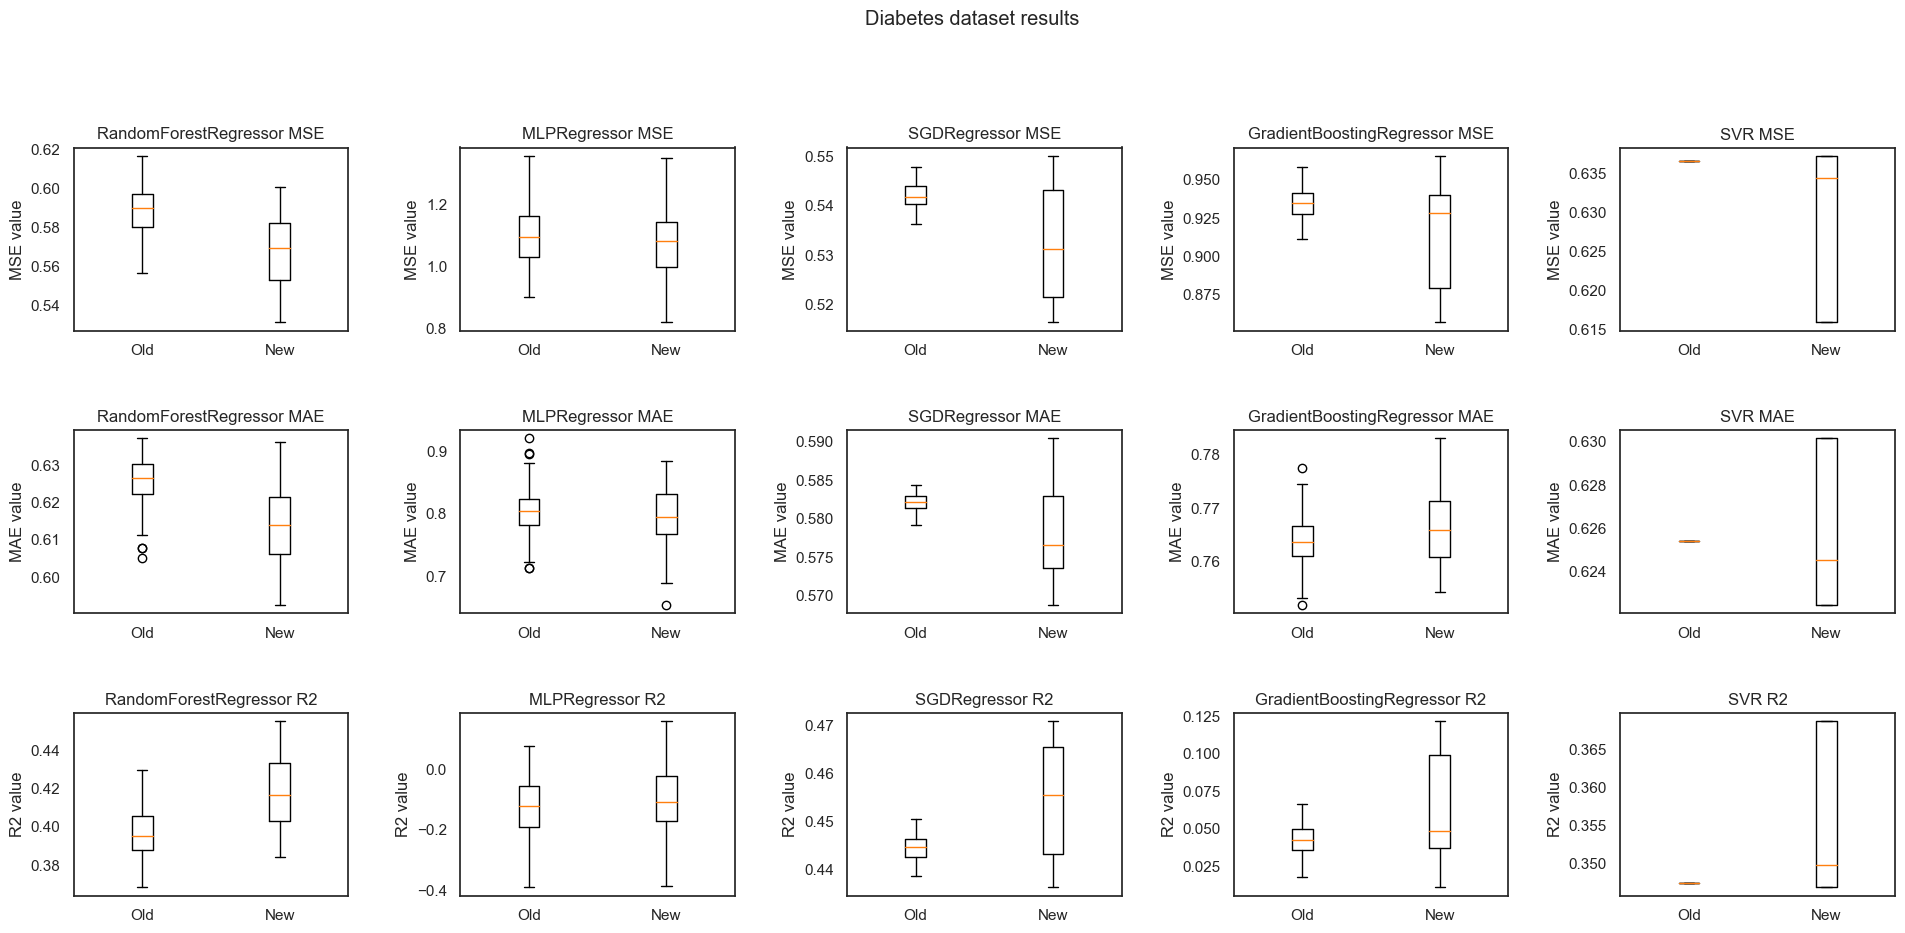

In [28]:
tests = tester.get_individual_tests()
mses = pd.DataFrame(columns = tests.keys())
maes = pd.DataFrame(columns = tests.keys())
r2s = pd.DataFrame(columns = tests.keys())
new_mses = pd.DataFrame(columns = tests.keys())
new_maes = pd.DataFrame(columns = tests.keys())
new_r2s = pd.DataFrame(columns = tests.keys())

for key in tests.keys():
    mses[key] = tests[key]["MSE"]
    maes[key] = tests[key]["MAE"]
    r2s[key] = tests[key]["R2"]
    new_mses[key] = tests[key]["NEW_MSE"]
    new_maes[key] = tests[key]["NEW_MAE"]
    new_r2s[key] = tests[key]["NEW_R2"]

NO_MODELS = len(tests.keys())
model_names = [i for i in tests.keys()]
NO_STATS = 3


fig, axs = plt.subplots(NO_STATS, NO_MODELS, figsize=(20, 10))
fig.suptitle('Diabetes dataset results')

# add padding
fig.tight_layout(pad=4.0)

for i in range(NO_MODELS):
    axs[0, i].boxplot([mses.iloc[:, i], new_mses.iloc[:, i]])
    axs[0, i].set_title(model_names[i] + ' MSE')
    axs[0, i].set_xticklabels(['Old', 'New'])
    axs[0, i].set(ylabel='MSE value')
    # set mse y range between 0 and 62000
    axs[0, i].set_yscale('linear')
    #axs[0, i].set_ylim(0.1, 2)

    axs[1, i].boxplot([maes.iloc[:, i], new_maes.iloc[:, i]])
    axs[1, i].set_title(model_names[i] + ' MAE')
    axs[1, i].set_xticklabels(['Old', 'New'])
    axs[1, i].set(ylabel='MAE value')

    # set mae y range between 0 and 80 in log scale
    axs[1, i].set_yscale('linear')
    #axs[1, i].set_ylim(0.1, 1.7)


    axs[2, i].boxplot([r2s.iloc[:, i], new_r2s.iloc[:, i]])
    axs[2, i].set_title(model_names[i] + ' R2')
    axs[2, i].set_xticklabels(['Old', 'New'])
    axs[2, i].set(ylabel='R2 value')
    # set r2 y range between -0.3 and 1 and linear scale
    axs[2, i].set_yscale('linear')
    #axs[2, i].set_ylim(-0.5, 1)

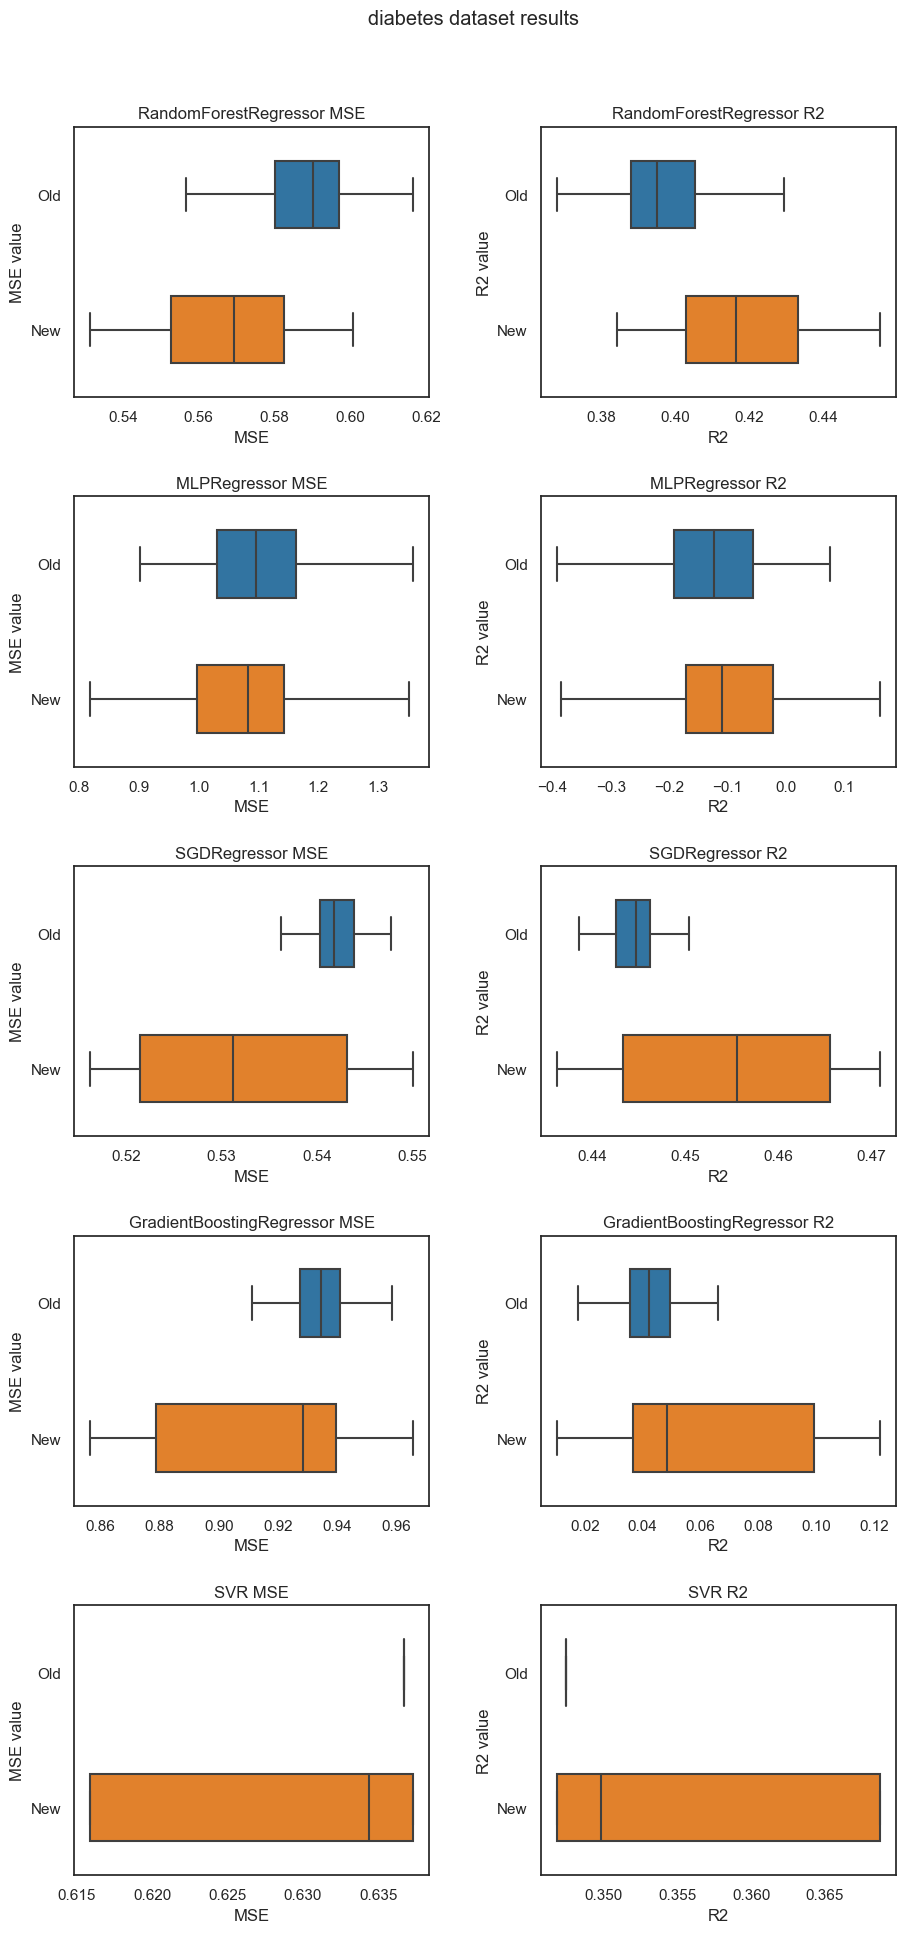

In [29]:
from makeplots import make_boxplots

tests = tester.get_individual_tests()

make_boxplots(tests, "diabetes")

NameError: name 'sns' is not defined

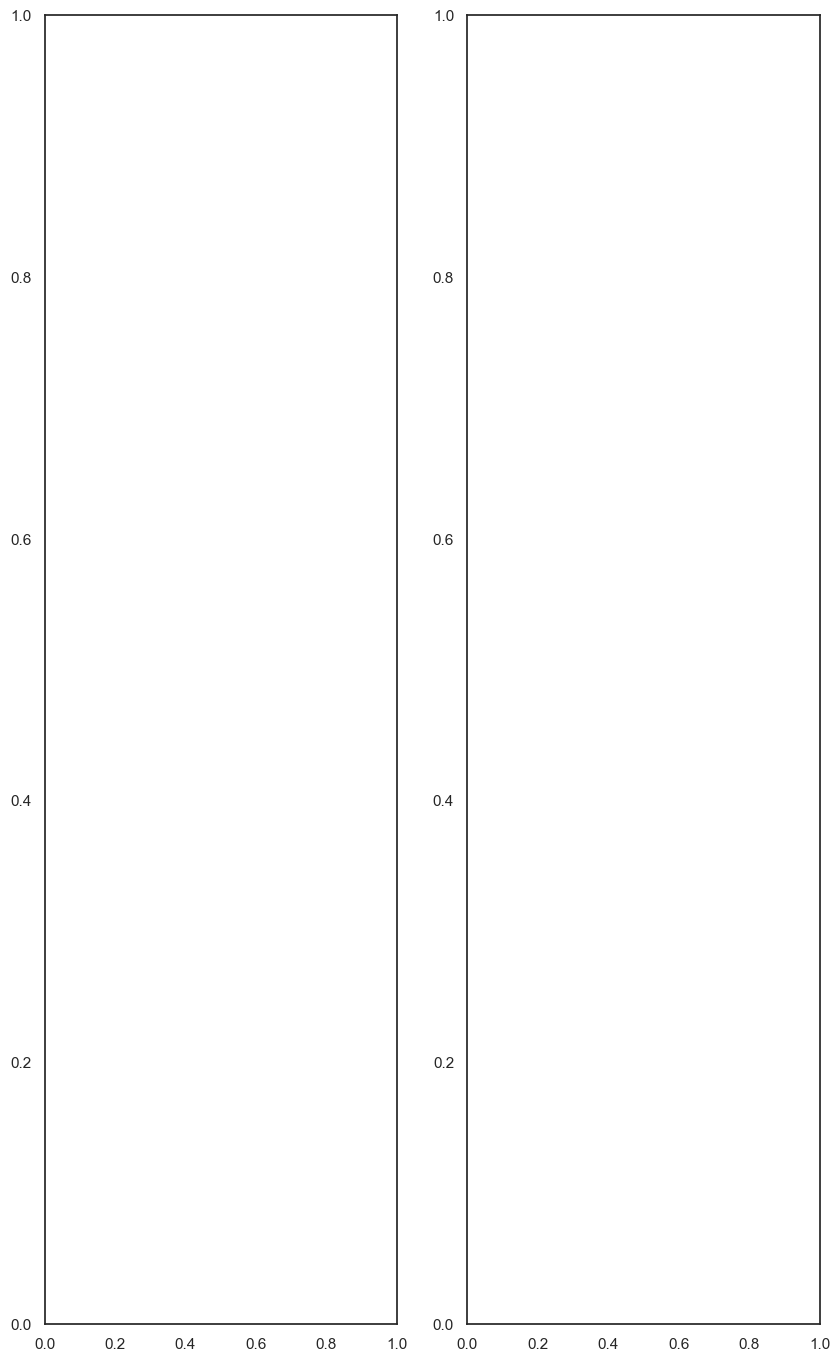

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(10, 17))

# get new dataframe of columsn mse, model

reshaped_old_mse = pd.melt(mses, var_name="Model", value_name="MSE")
reshaped_new_mse = pd.melt(new_mses, var_name="Model", value_name="MSE")

# add column type to both dataframes and set old to old and new to new
reshaped_old_mse["Type"] = "Old"
reshaped_new_mse["Type"] = "New"

# concatenate both dataframes
concat_mse = pd.concat([reshaped_old_mse, reshaped_new_mse])

# plot boxplot
b0 = sns.boxplot(x="MSE", y="Model", hue="Type", data=concat_mse, ax=axs[0], orient="h", width=0.5)
axs[0].set_title('MSE')
axs[0].set(ylabel='MSE value')

# get new dataframe of columsn mse, model

reshaped_old_r2 = pd.melt(r2s, var_name="Model", value_name="R2")
reshaped_new_r2 = pd.melt(new_r2s, var_name="Model", value_name="R2")

# add column type to both dataframes and set old to old and new to new
reshaped_old_r2["Type"] = "Old"
reshaped_new_r2["Type"] = "New"

# concatenate both dataframes
concat_r2 = pd.concat([reshaped_old_r2, reshaped_new_r2])

# plot boxplot
b1 = sns.boxplot(x="R2", y="Model", hue="Type", data=concat_r2, ax=axs[1], orient="h", width=0.5)
axs[1].set_title('R2')
axs[1].set(ylabel='R2 value')

b1.legend_.remove()
# remove xticker
b1.set_yticklabels([])




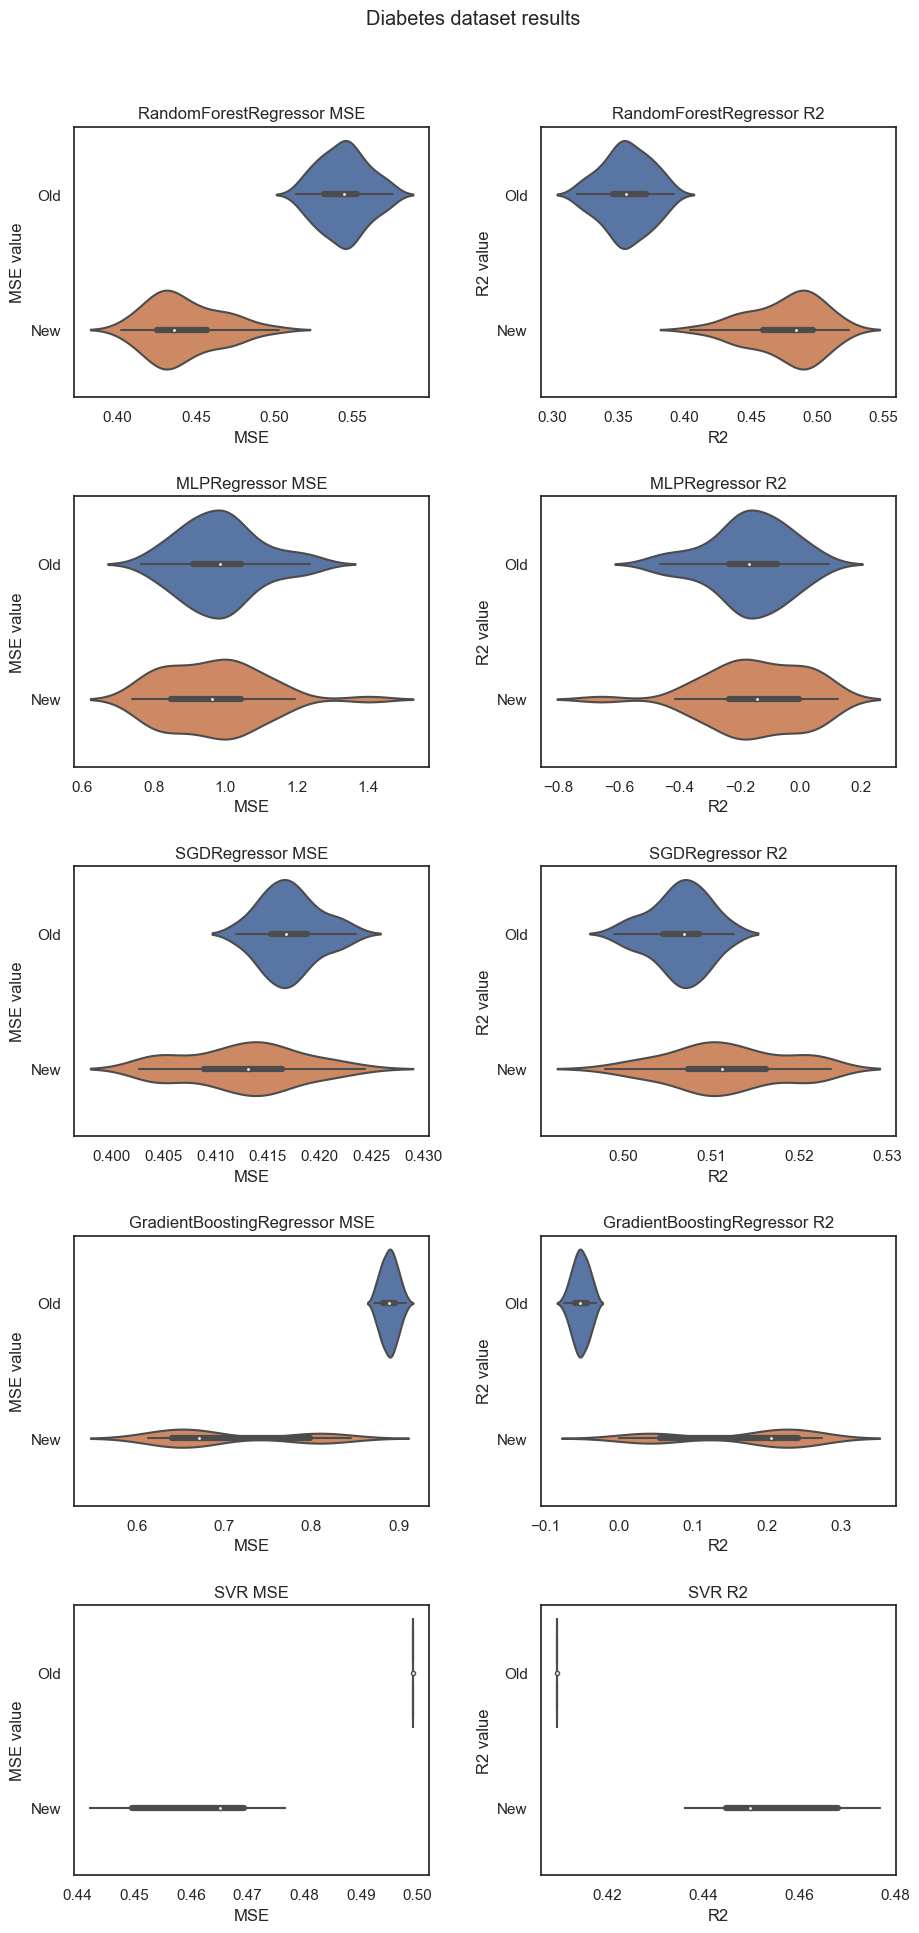

In [ ]:
import seaborn as sns

# seaborn boxplot mse and r2 for all models with new and old daa

fig, axs = plt.subplots(NO_MODELS, 2, figsize=(10, 20))
fig.suptitle('Diabetes dataset results')

# add padding
fig.tight_layout(pad=4.0)

# plot mse and r2

for i in range(NO_MODELS):

    sns.set_theme(style="white", palette=None)

    old_new_mse = pd.DataFrame({
        "MSE" : np.concatenate((mses.iloc[:, i], new_mses.iloc[:, i])),
        "Data" : np.concatenate((np.repeat("Old", mses.shape[0]), np.repeat("New", new_mses.shape[0]))),
        "Model" : np.repeat(model_names[i], mses.shape[0] + new_mses.shape[0])
    })

    # violin plot

    sns.violinplot(x="MSE", y="Data", data=old_new_mse, ax=axs[i, 0], orient="h", width=0.8)

    # add label for model name
    axs[i, 0].set_title(model_names[i] + ' MSE')
    axs[i, 0].set(ylabel='MSE value')
    # set mse y range between 0 and 62000


    old_new_r2 = pd.DataFrame({
        "R2" : np.concatenate((r2s.iloc[:, i], new_r2s.iloc[:, i])),
        "Data" : np.concatenate((np.repeat("Old", r2s.shape[0]), np.repeat("New", new_r2s.shape[0]))),
        "Model" : np.repeat(model_names[i], r2s.shape[0] + new_r2s.shape[0])
    })

    sns.violinplot(x="R2", y="Data", data=old_new_r2, ax=axs[i, 1], orient="h", width=0.8)

    # add label for model name
    axs[i, 1].set_title(model_names[i] + ' R2')
    axs[i, 1].set(ylabel='R2 value')
    
# seaborn boxplot mae for all models with new and old daa



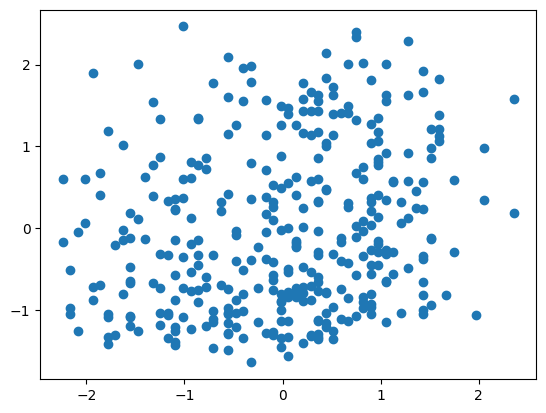

Min:  -2.2401835703124666 Max:  2.3551760441396445 Mean:  -1.0064344699151561e-17 Std:  1.0


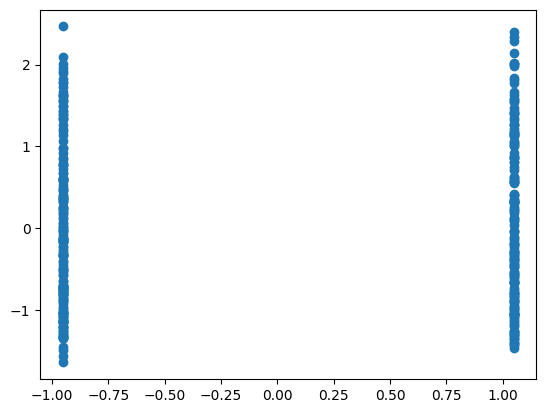

Min:  -0.9529470646935797 Max:  1.0493762319542397 Mean:  3.7741292621818353e-17 Std:  1.0000000000000009


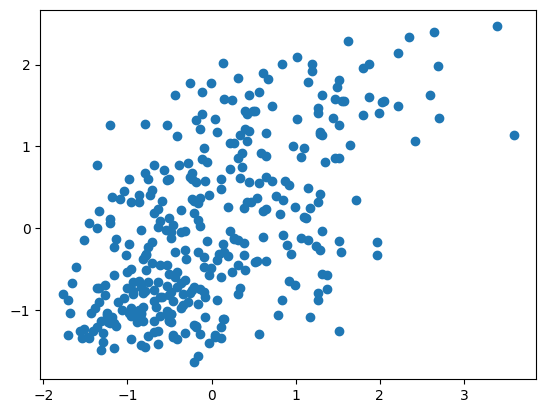

Min:  -1.7687840144052167 Max:  3.590222230086684 Mean:  5.0321723495757806e-18 Std:  0.9999999999999998


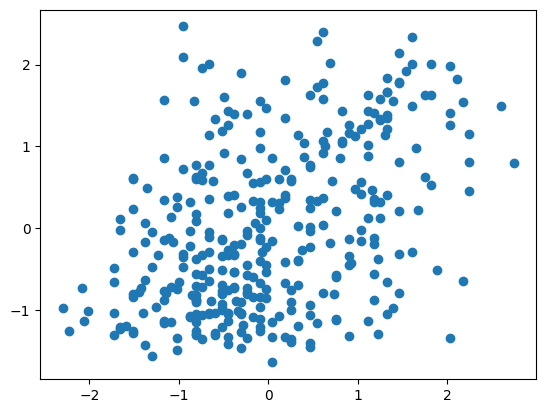

Min:  -2.2975173247534872 Max:  2.7444571942582554 Mean:  1.8870646310909177e-17 Std:  1.0


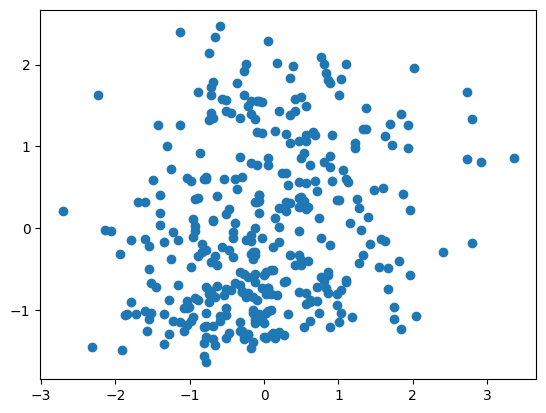

Min:  -2.7082592170970794 Max:  3.3573384795904735 Mean:  -1.5096517048727343e-17 Std:  1.0


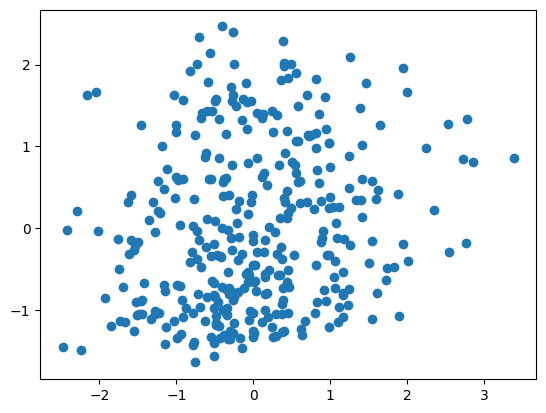

Min:  -2.473650475480352 Max:  3.3801044812096306 Mean:  5.0321723495757806e-18 Std:  0.9999999999999998


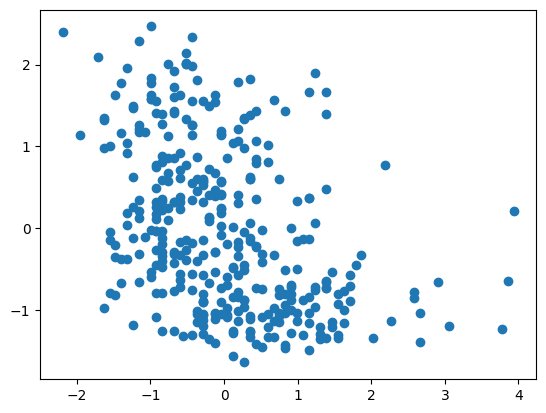

Min:  -2.1904664801050933 Max:  3.934637104662825 Mean:  1.3083648108897028e-16 Std:  1.0000000000000007


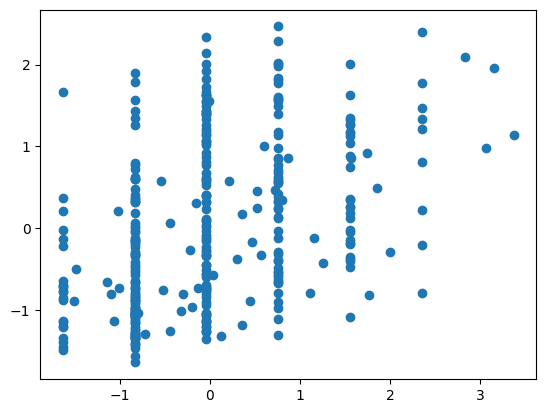

Min:  -1.629187299194281 Max:  3.3681112013949503 Mean:  -9.057910229236404e-17 Std:  0.999999999999999


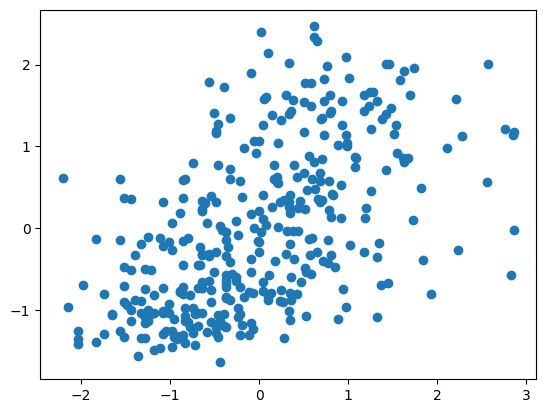

Min:  -2.2036919028630475 Max:  2.8583407720873026 Mean:  -1.0064344699151561e-17 Std:  1.0000000000000002


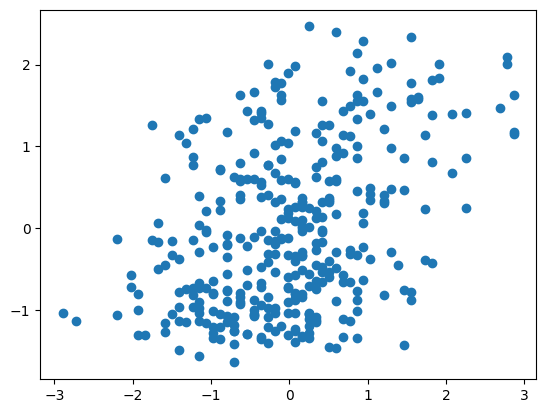

Min:  -2.893688650359376 Max:  2.8630493033655617 Mean:  -5.0321723495757806e-18 Std:  0.9999999999999999


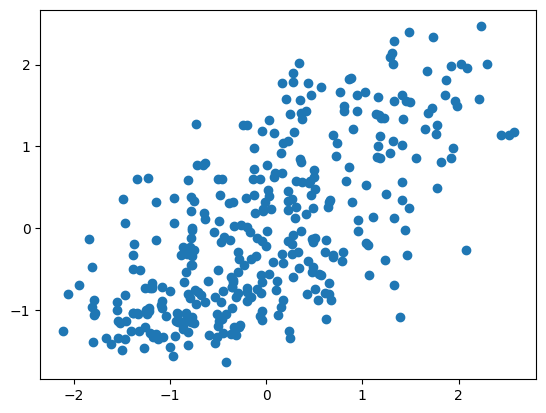

Min:  -2.115198168283117 Max:  2.573282286566463 Mean:  -1.0064344699151561e-17 Std:  1.0


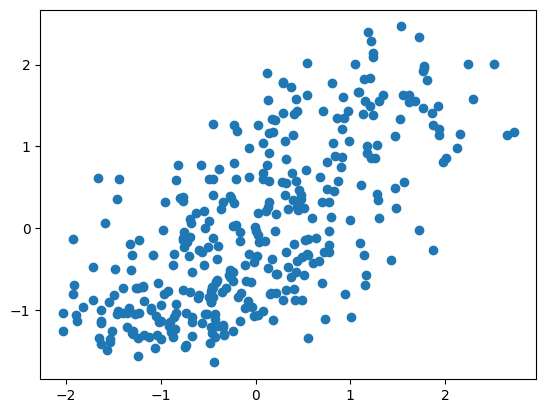

Min:  -2.035370613132699 Max:  2.724463240824678 Mean:  -1.0064344699151561e-17 Std:  1.0


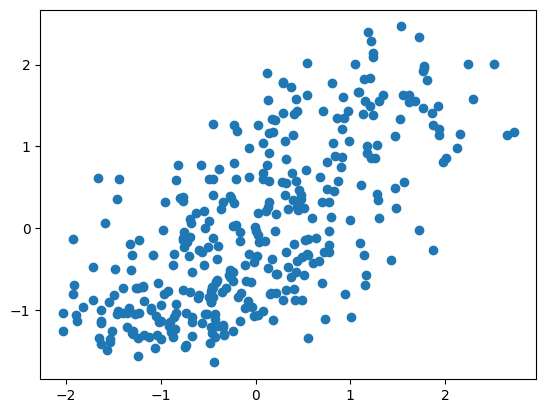

Min:  -2.0353706131326987 Max:  2.724463240824677 Mean:  2.0128689398303122e-17 Std:  0.9999999999999998


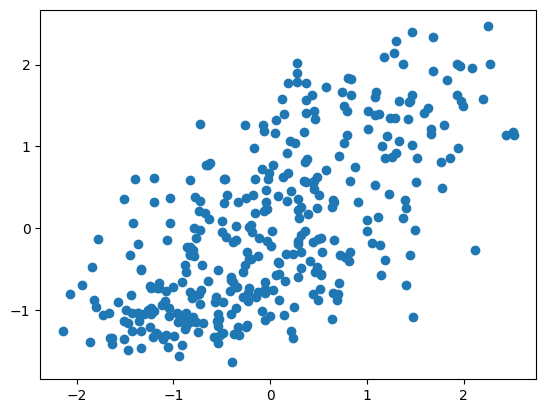

Min:  -2.143130115287087 Max:  2.516153405576286 Mean:  1.0064344699151561e-17 Std:  1.0


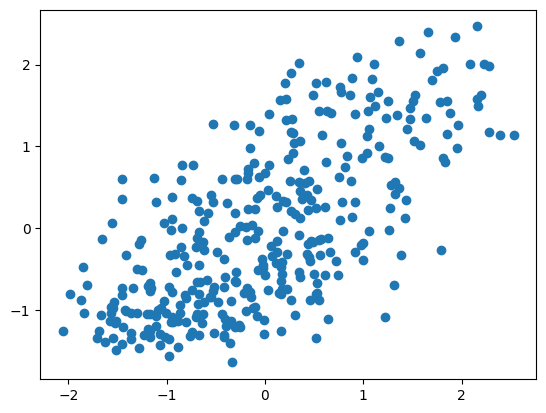

Min:  -2.0577507456538124 Max:  2.530835988969488 Mean:  0.0 Std:  1.0


In [ ]:
for i in range(tester.new_X_train.shape[1]):
    plt.clf()
    plt.scatter(tester.new_X_train[:, i], tester.y_train)
    plt.show()
    print("Min: ", tester.new_X_train[:, i].min(), "Max: ", tester.new_X_train[:, i].max(), "Mean: ", tester.new_X_train[:, i].mean(), "Std: ", tester.new_X_train[:, i].std())
    